### Challenge exercises (30 points)



These exercises are a little more challenging. You'll get sample
solutions from me.

-   [DataCamp problem and solution workspace](https://app.datacamp.com/workspace/w/113fdd0f-9ae4-46aa-9a13-0ea9b9f30d57/edit).



#### Averaging results



Because our simulations are random, the results vary from one run to
another, and the results of a parameter sweep tend to be noisy.  We
can get a clearer picture of the relationship between a parameter and
a metric by running multiple simulations with the same parameter and
taking the average of the results.

Write a function called `run_multiple_simulations` that takes as
parameters `p1`, `p2`, `num_steps`, and `num_runs`. `num_runs`
specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers
(at leap or at city) in a `TimeSeries`.  At the end, it should return
the `TimeSeries`.

Test your function with these parameters:

    p1 = 0.3
    p2 = 0.3
    num_steps = 60
    num_runs = 10

Display the resulting `TimeSeries` and use the `mean` function from
NumPy to compute the average number of unhappy customers.

---

Solution:



In [1]:
<<import modsim>>
<<def bike_to_leap>>
<<def bike_to_city>>
<<def step>>
<<def run_simulation>>

from modsim import TimeSeries

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    """Run num_runs simulations using run_simulation.

    p1, p2: customers/min in locations leap and city
    num_steps: steps for one simulation
    num_runs: number of run_simulation repetitions
    """
    # store total number of unhappy customers in a TimeSeries object
    total = TimeSeries()

    for i in range(num_runs):
        state = run_simulation(p1,p2,num_steps)
        total[i] = state.leap_empty + state.city_empty

    return total

Running the simulations, computing the average:



In [1]:
<<def run_multiple_simulations>>
from modsim import show

# run 10 simulations with 60 steps each and 0.3 customers/min everywhere
total = run_multiple_simulations(0.3, 0.3, 60, 10)

# print TimeSeries result for total number of customers
print(show(total))

from numpy import mean
print(mean(total))

#+begin_example
      Quantity
Time
0            7
1            1
2            0
3            0
4            2
5            0
6            4
7            1
8            2
9            4
2.1
#+end_example

Visualize the average over the simulations:



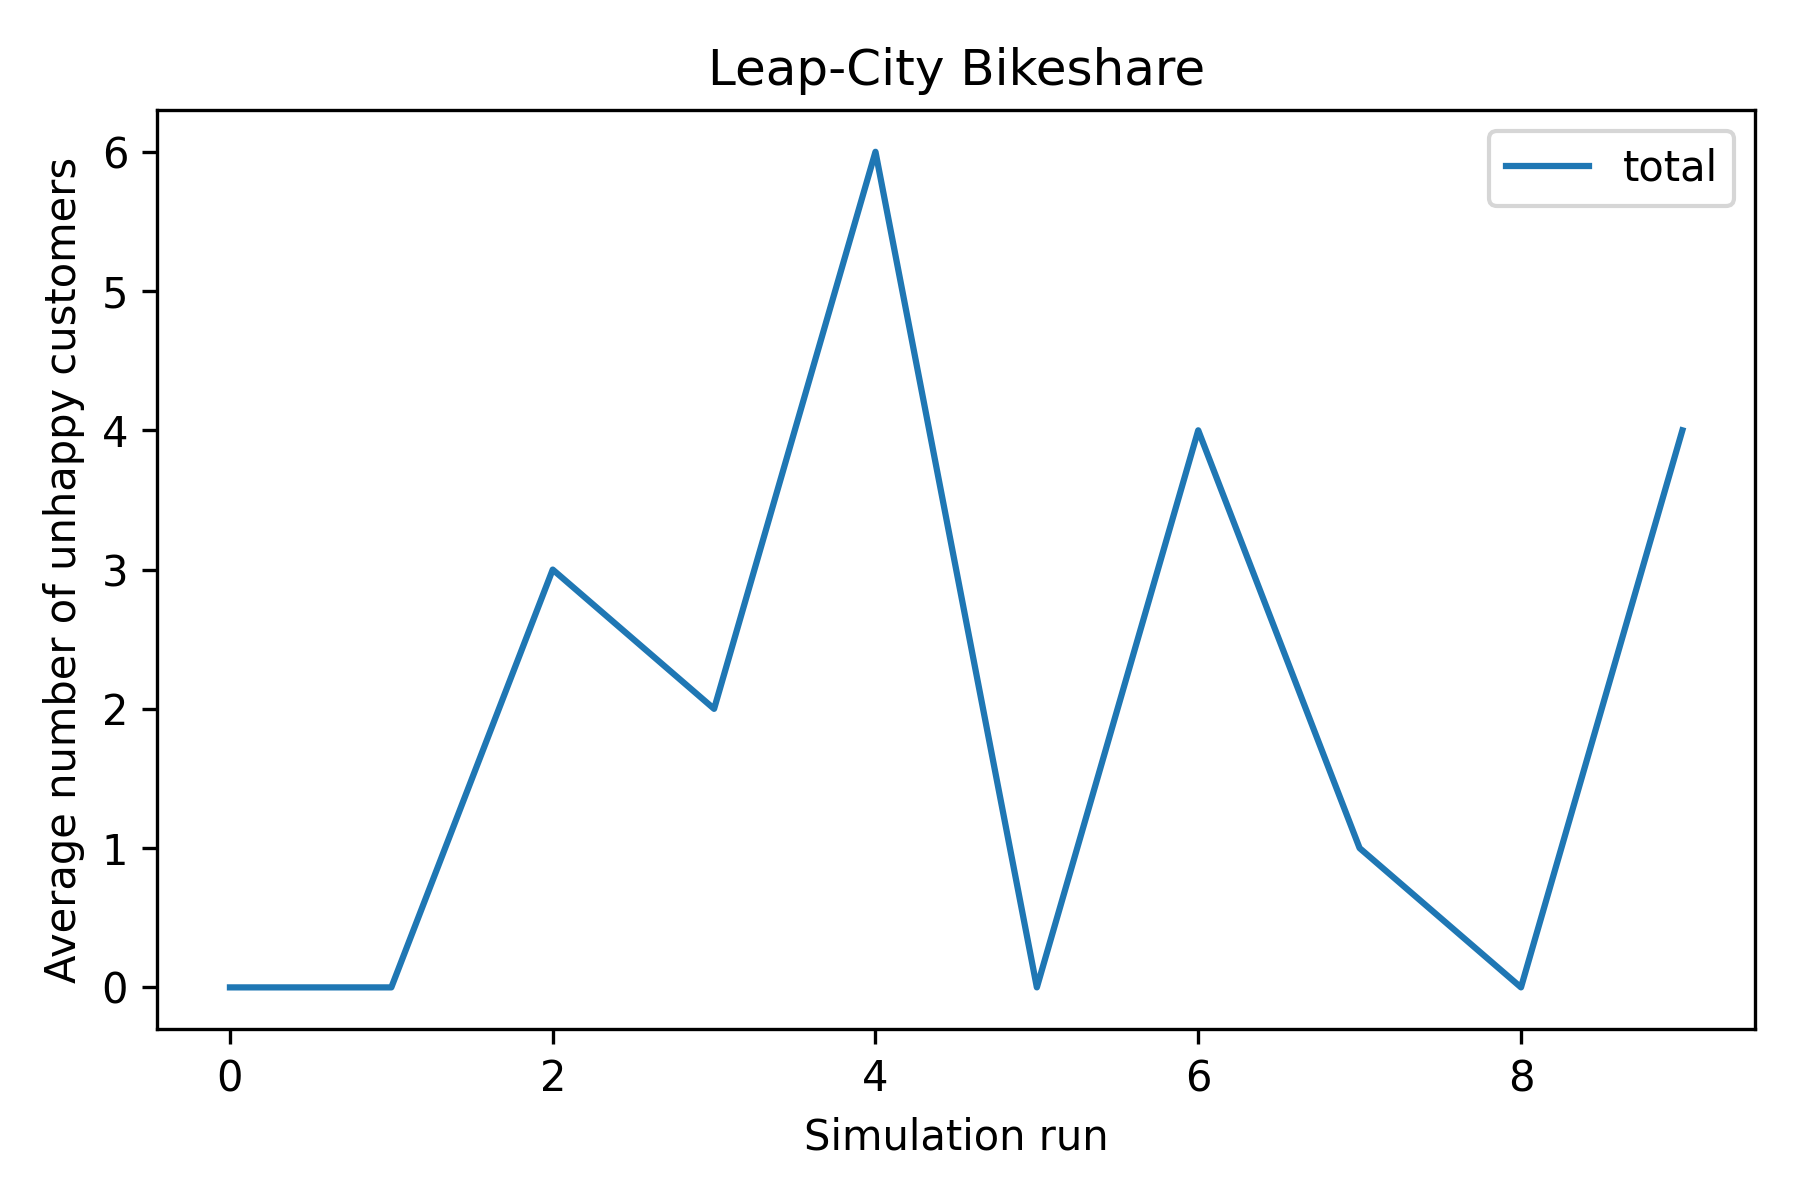

In [1]:
unhappy.plot(label='total', color='C0')
decorate(title='Leap-City Bikeshare',
         xlabel='Simulation run',
         ylabel='Average number of unhappy customers')

import matplotlib.pyplot as plt
plt.savefig("img/unhappy.png")
plt.clf()

#### Sweeping through two parameter value sets



Continuing the previous exercise, use `run_multiple_simulations` to run
simulations with a range of values for `p1` and `p2`.

    p2 = 0.3
    num_steps = 60
    num_runs = 20

Store the results in a `SweepSeries`, then plot the average number of
unhappy customers as a function of `p1` (use color 'C4'). Label axes.

What value of `p1` minimizes the average number of unhappy customers?

---

Solution: run multiple simulations. For each simulation run, pick a
different `p1`. Store the average number of unhappy customers for that
run in a `SweepSeries` value.



In [1]:
<<def run_multiple_simulations>>
from modsim import show, SweepSeries

# create p1_array using numpy.linspace
p1_array = linspace(0,1,10)  # 10 p1 values in [0,1]
p2 = 0.3
num_steps = 60
num_runs = 20

# initialize SweepSeries
sweepRun = SweepSeries()

# run 20 simulations with 60 steps each and 0.3 customers/min at LEAP
for p1 in p1_array:
    total = run_multiple_simulations(p1,p2,num_steps,num_runs)

    # store average number of unhappy customers for each p1 sweep
    sweepRun[p1] = mean(total)

Solution: plot the average number of unhappy customers at LEAP vs. the
p1 value of that sweep.



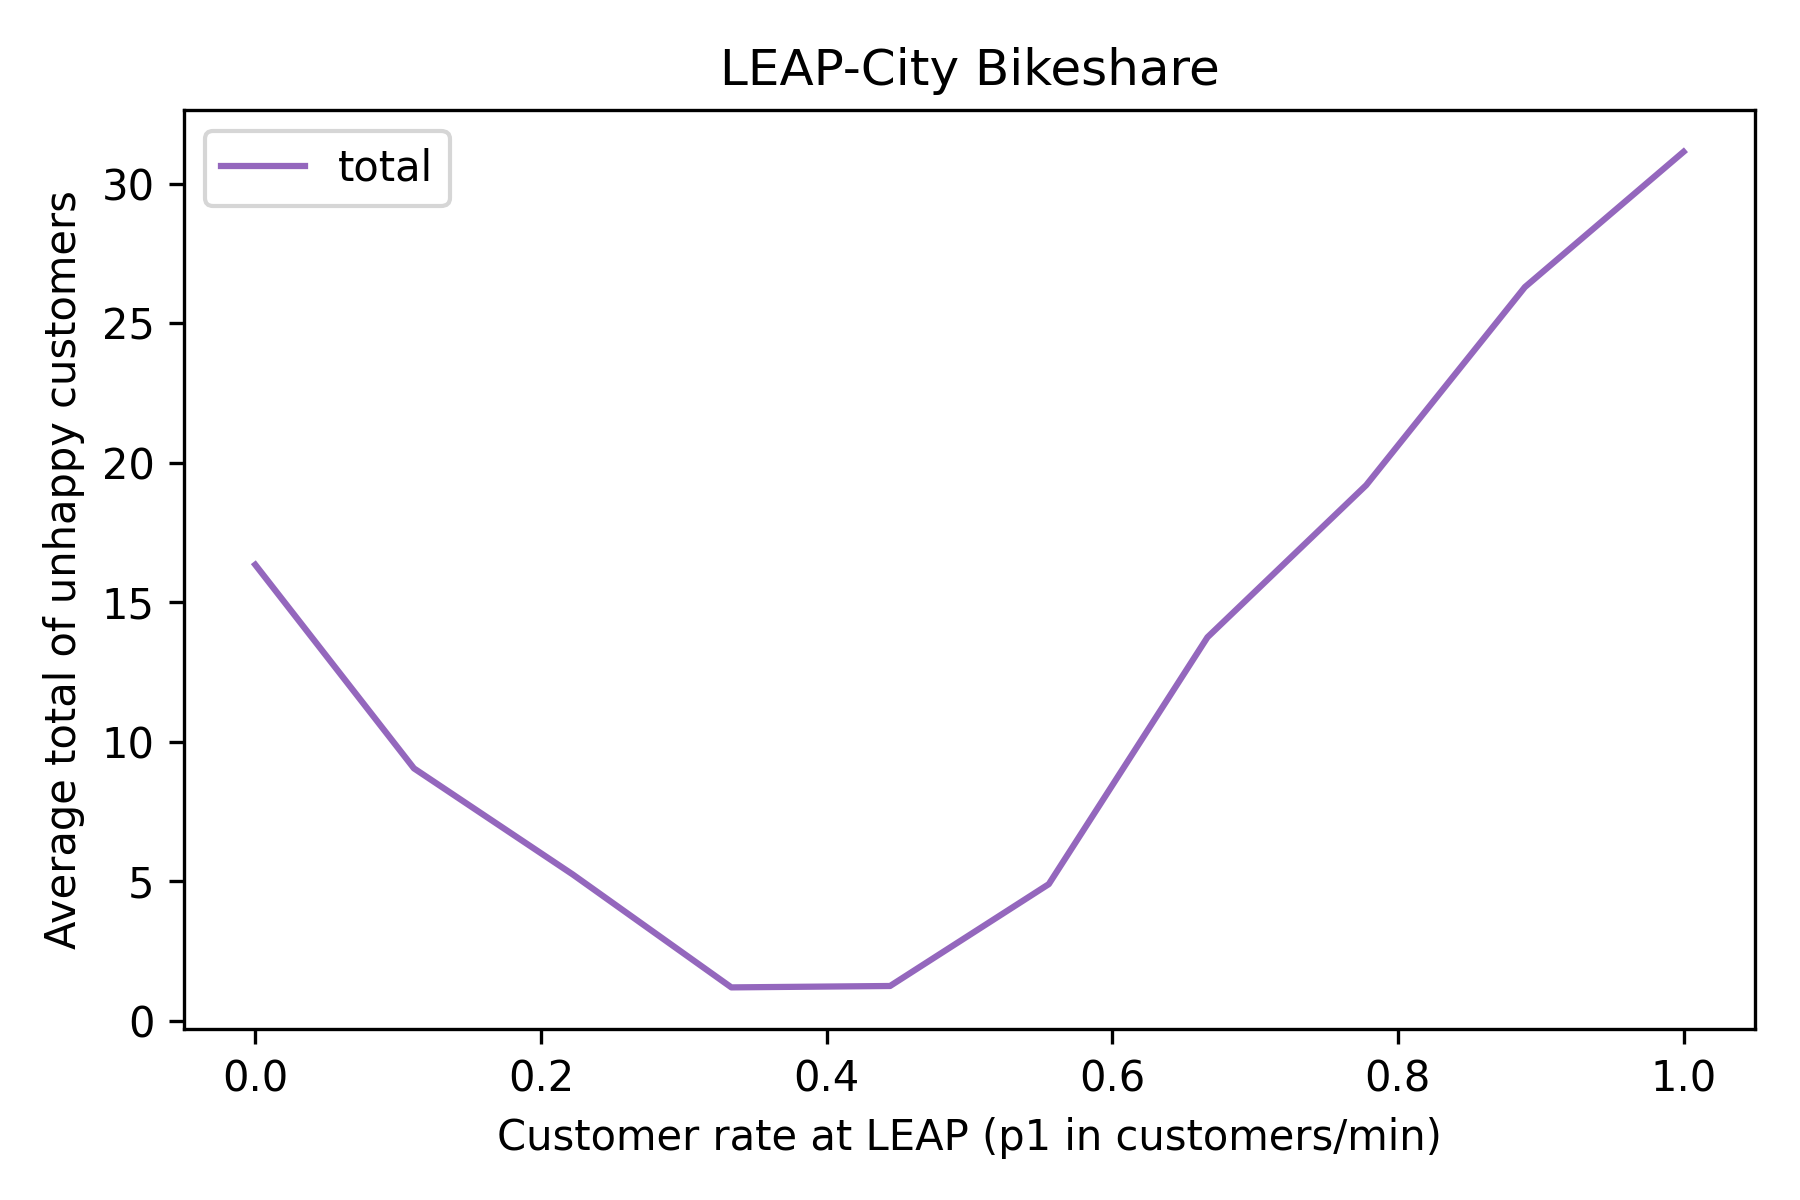

In [1]:
# plot average number of unhappy customers at LEAP location vs. p1
sweepRun.plot(label='total', color='C4')

# customize plot
decorate(title='LEAP-City Bikeshare',
         xlabel='Customer rate at LEAP (p1 in customers/min)',
         ylabel='Average total of unhappy customers')

# store figure in PNG file, then clear current figure.
plt.savefig("img/leapSweep.png")  # import matplotlib.pyplot as plt
plt.clf()